## Case 2.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import scipy.linalg as lng # linear algebra from scipy library
from sklearn import preprocessing as preproc # load preprocessing function
from pathlib import Path
from PIL import Image

from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn import preprocessing
from pathlib import Path
import scipy.io
import os
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [3]:
df = pd.read_csv('labels.csv',names=['Age','Gender','Race'])
#Age: integer from 0-116
#Gender:0-male, 1-female
#Race:0 to 4, denoting White, Black, Asian, Indian, and Others (Hispanic, Latino, Middle Eastern)
df

,Age,Gender,Race
0,100,0,0
1,100,0,0
2,100,1,0
3,100,1,0
4,100,1,0
...,...,...,...
23700,9,1,3
23701,9,1,3
23702,9,1,4
23703,9,1,4


In [4]:
data_paths = os.listdir('Faces')
n=len(data_paths)
p=200*200
X=np.zeros([n,p])

list_img=[]
# load images
for img in data_paths:
    list_img.append(img[:-4])
    
list_img.sort(key=int)

In [5]:
for idx,el in enumerate(list_img):
    img=plt.imread('Faces/'+el+'.jpg')
    img2=rgb2gray(img)/255
    flatten=img2.flatten()
    X[idx]=flatten

In [7]:
print('Number of observations:',X.shape[0])
print('Number of features:',X.shape[1])

Number of observations: 23705
Number of features: 40000


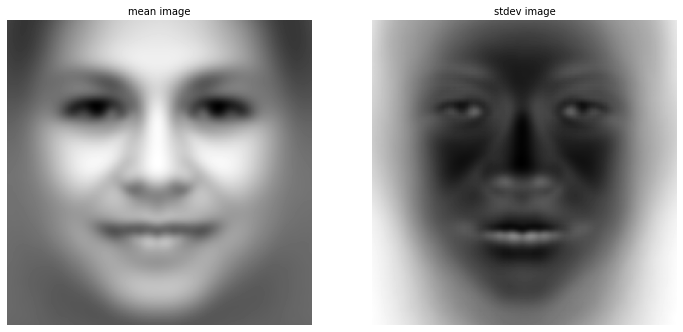

In [6]:
#show mean face and standard deviation
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

ax[0].imshow(np.mean(X,axis=0).reshape(200,200), cmap='gray');
ax[0].set_axis_off(); ax[0].set_title('mean image',fontsize=10)
        
ax[1].imshow(np.std(X,axis=0).reshape(200,200), cmap='gray');
ax[1].set_axis_off(); ax[1].set_title('stdev image',fontsize=10)

plt.show()

#### Select Age Group:

In [7]:
def select_age_range(X,df,AgeMin,AgeMax):
    label_sub=df[(df['Age']>=AgeMin) & (df['Age']<=AgeMax)]
    ind=label_sub.index.tolist()
    Xsub=X[ind]
    return Xsub, label_sub

def select_race(X,df,race):
    label_sub=df[(df['Race']==race)]
    ind=label_sub.index.tolist()
    Xsub=X[ind]
    return Xsub, label_sub

In [8]:
Xsub, label_sub=select_age_range(X,df,50,75)
print(Xsub.shape)
print(label_sub.shape)


Xsub_white, label_white_sub=select_race(X,df,0)
print(Xsub_white.shape)
print(label_white_sub.shape)


(4136, 40000)
(4136, 3)
(10078, 40000)
(10078, 3)


In [9]:
Xsub.shape

(4136, 40000)

#### Perform PCA for feature selection/ Dimension Reduction:

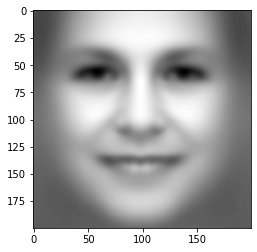

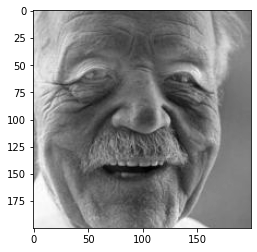

In [10]:
mean_img=np.mean(Xsub_white,axis=0)
plt.imshow(mean_img.reshape(200,200),cmap='gray')
plt.show()

without_mean = np.subtract(Xsub_white, mean_img)
plt.imshow(without_mean[0].reshape(200,200),cmap='gray')
plt.show()

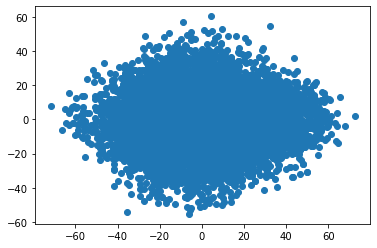

In [11]:
N_COMPONENTS = 100

pca = PCA(N_COMPONENTS) # TODO: Decide how many PC we want to use. Maybe use forward selection if we have time.

pc_scores = pca.fit_transform(without_mean)
pc_scores.shape

plt.scatter(pc_scores[:,0], pc_scores[:,1]) 
plt.show()

In [31]:
pc_scores_df = pd.DataFrame(data = pc_scores) #4136 features x 300 columns
print(pc_scores_df.shape)
#Explained variance with that componence
print(np.sum(pca.explained_variance_ratio_))

# this are the veps
print(pca.components_.shape)
reshaped_pcs = np.reshape(pca.components_, (100, 200, 200))

pc_scores_df
#np.array(pc_scores_df)[0,:].shape

(10078, 100)
0.9149640444948248
(100, 40000)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,4.283106,-4.406891,25.196736,-5.828377,13.708606,7.069832,-4.973986,-1.287441,8.049190,-0.570848,...,-0.027095,1.411645,0.811957,-0.346954,-0.120152,-0.703987,-0.143807,1.838005,-1.611906,0.287264
1,11.758361,30.376990,1.461615,-4.914392,-0.142332,5.930408,-7.245202,-4.600445,-3.062092,-1.788228,...,0.345571,-0.833358,-0.370570,1.225682,-0.039549,-0.115126,-1.248249,1.683339,-0.850271,2.075535
2,13.437978,-34.686826,-15.108144,-12.462732,2.797464,-9.872260,1.268135,6.684625,-3.290693,2.056425,...,1.256532,-0.798992,-0.680926,2.267227,0.995375,0.637802,-0.319932,-0.765398,-2.841694,0.655145
3,0.353337,7.955725,-9.433880,-2.701412,-5.663127,-3.991317,1.312710,-4.665297,2.880690,-10.388529,...,-1.150780,0.187792,-3.176254,-2.106212,-0.946766,1.493588,-0.194434,2.025122,1.163639,0.774898
4,4.479461,3.791990,-2.723876,-7.911819,-14.496121,-10.018760,-1.985754,-4.257911,3.309062,-10.518591,...,1.239281,0.722115,-1.065107,-1.784328,0.016086,0.958237,-0.347422,0.499930,0.462078,-0.229021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10073,-14.978890,34.867036,18.339269,-8.308124,8.728346,1.069706,6.407453,-0.303335,-8.505038,-0.956410,...,0.651586,0.671435,-0.031537,-0.458956,-0.322576,0.120926,-0.007502,-0.881749,-0.162630,0.328735
10074,-21.668572,2.809925,-5.574098,0.691189,-4.147968,1.030677,1.308128,0.253407,3.767502,-16.785488,...,0.506253,-2.965546,0.155343,-0.633455,-0.784280,-1.159741,-1.142968,1.383794,-1.320388,0.001976
10075,6.243129,24.977111,-3.509342,-2.722604,-7.736499,8.400964,2.805808,-0.944773,9.239095,-2.415766,...,-0.985056,-0.179956,1.272529,-0.472588,-0.648972,0.578920,0.402446,1.450168,-0.745031,0.531791
10076,18.017878,-23.288112,-0.150245,0.357652,-8.666877,-7.107351,6.638832,-6.070443,0.387199,-7.636892,...,-0.894690,-2.087509,-0.350376,0.577459,0.378475,1.670045,-1.271271,-2.235986,0.164990,0.121681


(10078, 40000)


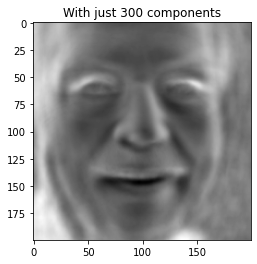

In [41]:
#Reconstuct images again: 
reco_img=np.array(pc_scores_df)@pca.components_

print(reco_img.shape)
I=reco_img[0].reshape(200,200)
plt.imshow(I,cmap='gray')
plt.title('With just 300 components')
plt.show()

#### Perform Clustering Algorithm:

In [32]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(pc_scores_df)

In [35]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

#### Analysis of the Clustering:

In [37]:
def analyze_cluster(kmeans, Xsub):
    #put image indexes in a dictionary from the clustering
    mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

    return mydict
    
mydict=analyze_cluster(kmeans, Xsub)
mydict

{0: array([    1,     4,     5, ..., 10073, 10075, 10077]),
 1: array([    8,     9,    17, ..., 10054, 10066, 10074]),
 2: array([   11,    14,    18, ..., 10056, 10068, 10072]),
 3: array([    0,     2,    25, ..., 10060, 10067, 10076]),
 4: array([    3,     6,    12, ..., 10064, 10069, 10071])}

In [ ]:
equal=0
not_equal=0

for ind,la in enumerate(label_sub['Race']):
    if kmeans.labels_[ind] == la:
        equal+=1
    else:
        not_equal+=1

    

In [41]:
def reset_index_race(label_sub): 
    groups=[]
    reset_index_label=label_sub['Race'].reset_index() 
    White= reset_index_label[reset_index_label['Race']==0].index.tolist()
    groups.append(White)
    Black= reset_index_label[reset_index_label['Race']==1].index.tolist()
    groups.append(Black)
    Asian= reset_index_label[reset_index_label['Race']==2].index.tolist()
    groups.append(Asian)
    Indian= reset_index_label[reset_index_label['Race']==3].index.tolist()
    groups.append(Indian)
    Others= reset_index_label[reset_index_label['Race']==4].index.tolist()
    groups.append(Others)
    return groups

def reset_index_age(label_sub): 
    #fer-ho be
    groups=[]
    reset_index_label=label_sub['Age'].reset_index() 
    White= reset_index_label[reset_index_label['Age']<=10].index.tolist()
    groups.append(White)
    Black= reset_index_label[reset_index_label['Age']<=30].index.tolist()
    groups.append(Black)
    Asian= reset_index_label[reset_index_label['Age']<=50].index.tolist()
    groups.append(Asian)
    Indian= reset_index_label[reset_index_label['Age']<=70].index.tolist()
    groups.append(Indian)
    Others= reset_index_label[reset_index_label['Age']>=90].index.tolist()
    groups.append(Others)
    return groups


"""
groups_race=reset_index_race(label_sub)
for i in groups_race:
    print(len(i))

 """


'\ngroups_race=reset_index_race(label_sub)\nfor i in groups_race:\n    print(len(i))\n\n '

In [45]:
groups_age=reset_index_race(label_white_sub)

groups_age[0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
